In [27]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import diffprivlib.models as dpmod
import sklearn.naive_bayes as skmod
import sklearn.metrics as met
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [28]:
trainx = pd.read_csv('trainx.csv')
testx = pd.read_csv('testx.csv')

## Create labels for train data that will be used for demonstration of privacy enhancing technologies

In [29]:
given_w_fin_act = [0, -2, 0, 0, 2, 2, 1, 3, 1, 1, 1, 3, 0, 2, 1, 1, 1, 0, 0, -2, -1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, -1, -2, 1, 2, 2, 2, 1, 1, 1, 1, 1, -1, -1, -2, -3, 0, -1, 1, -1, -1, 0, -1, -1, 0, 0, 0]
given_w_fin_help = [2, -2, 0, 1, -1, -1, 1, 1, 1, 1, 1, 0, -2, 1, -1, -1, -1, -2, -1, 1, -1, 1, 0, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -2, 1, 2, 2, 2, 1, 1, 1, 1, 1, -2, -2, -3, -4, 0, -1, 1, -1, -1, -1, -1, 1, 0, 0, 0]
given_w_ret = [1, -2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, -2, 1, 0, 0, 0, 1, 2, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -2, 1, 2, 3, 4, 4, 2, 1, 1, 1, -2, -2, -3, -4, 0, 1, -1, 1, 2, 1, 1, 1, 0, 0, 0]

In [30]:
trainx.describe()

,Unnamed: 0,urban,hhsize,head_gender,s2_q10_mktcentre,s2_q19_floormat,s2_q20_wallmat,s2_q21a_powergrid,ownasset_0,ownasset_1,...,s5_q41a_nofoodadult,s5_q41b_nofoodchild,wave,sum_s4_q19_earnings,sum_s4_q19_laidoff,sum_s4_q20_profits,sum_s4_q20_salestrend,sum_s4_q20c_survive,s7_q1_receivegifthh,s4_q1_agactivity
count,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,...,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000
mean,4599.000000,0.238287,3.531797,0.450919,0.061202,2.808675,6.670834,0.426242,0.186759,0.408631,...,0.301555,0.069355,4.415806,2185.067942,0.582563,632.814328,755.134036,0.570714,0.027068,0.016306
std,2655.666897,0.426823,3.165412,0.500662,0.825274,1.381756,5.477893,0.494557,0.389739,0.491608,...,0.847305,0.543773,2.258913,14572.437739,15.521251,2909.461799,3770.269176,2.800688,0.466566,0.135771
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2299.500000,0.000000,1.000000,0.000000,-1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4599.000000,0.000000,3.000000,0.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6898.500000,0.000000,5.000000,1.000000,1.000000,3.000000,11.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9198.000000,1.000000,14.000000,1.000000,1.000000,8.000000,17.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,8.000000,540000.000000,594.000000,150000.000000,80000.000000,150.000000,1.000000,1.000000


In [31]:
# Adding offset so the '0's in the columns have value 
trainx_ref = pd.DataFrame()
for column in trainx:
    trainx_ref[column] = trainx[column] + 1

In [32]:
# replacing the missing values with averages
for column in trainx:
    trainx_ref[column][trainx_ref[column] == 0] = trainx[column].mean()+1

C:\Users\mssid\AppData\Local\Temp\ipykernel_22696\3693415543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx_ref[column][trainx_ref[column] == 0] = trainx[column].mean()+1


In [33]:
# Normalising to give equal weights to all the columns
for column in trainx:
    trainx_ref[column] = trainx_ref[column]/max(trainx_ref[column])

In [34]:
trainx_ref['fin_act'] = 0
trainx_ref['fin_help'] = 0
trainx_ref['ret'] = 0
for ind in range(trainx_ref.shape[0]):
    trainx_ref['fin_act'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_fin_act)
    trainx_ref['fin_help'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_fin_help)
    trainx_ref['ret'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_ret)

C:\Users\mssid\AppData\Local\Temp\ipykernel_22696\3291063501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx_ref['fin_act'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_fin_act)
C:\Users\mssid\AppData\Local\Temp\ipykernel_22696\3291063501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx_ref['fin_help'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_fin_help)
C:\Users\mssid\AppData\Local\Temp\ipykernel_22696\3291063501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

<AxesSubplot: xlabel='ret'>

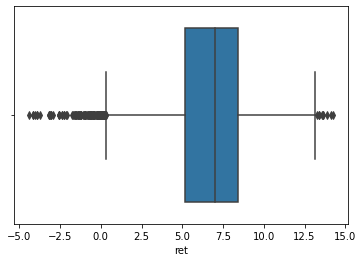

In [35]:
sns.boxplot(data = trainx_ref, x='ret')

<AxesSubplot: xlabel='fin_act'>

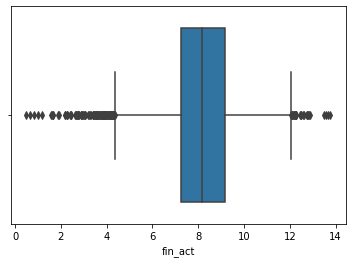

In [36]:
sns.boxplot(data = trainx_ref, x='fin_act')

<AxesSubplot: xlabel='fin_help'>

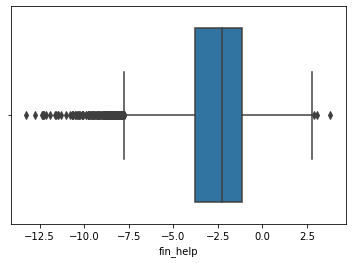

In [37]:
sns.boxplot(data = trainx_ref, x='fin_help')

In [38]:
trainx_ref.describe()

,Unnamed: 0,urban,hhsize,head_gender,s2_q10_mktcentre,s2_q19_floormat,s2_q20_wallmat,s2_q21a_powergrid,ownasset_0,ownasset_1,...,sum_s4_q19_earnings,sum_s4_q19_laidoff,sum_s4_q20_profits,sum_s4_q20_salestrend,sum_s4_q20c_survive,s7_q1_receivegifthh,s4_q1_agactivity,fin_act,fin_help,ret
count,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.00000,9199.000000,...,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000
mean,0.500054,0.619345,0.307572,0.726563,0.696028,0.429167,0.509730,0.713121,0.59338,0.704316,...,0.004048,0.002660,0.004225,0.009452,0.010402,0.562660,0.508761,8.160311,-2.610093,6.636397
std,0.288691,0.213118,0.207016,0.248723,0.234765,0.144928,0.223631,0.247278,0.19487,0.245804,...,0.026986,0.026086,0.019396,0.047128,0.018548,0.163636,0.065569,1.484848,2.128847,2.521359
min,0.000109,0.500000,0.066667,0.500000,0.500000,0.111111,0.055556,0.500000,0.50000,0.500000,...,0.000002,0.001681,0.000007,0.000012,0.006623,0.500000,0.500000,0.471408,-13.265492,-4.422093
25%,0.250082,0.500000,0.133333,0.500000,0.500000,0.333333,0.426157,0.500000,0.50000,0.500000,...,0.000002,0.001681,0.000007,0.000012,0.006623,0.500000,0.500000,7.246910,-3.796986,5.159850
50%,0.500054,0.500000,0.266667,0.500000,0.530601,0.444444,0.444444,0.500000,0.50000,0.500000,...,0.000002,0.001681,0.000007,0.000012,0.006623,0.500000,0.500000,8.156287,-2.241972,7.026510
75%,0.750027,0.500000,0.400000,1.000000,1.000000,0.444444,0.666667,1.000000,0.50000,1.000000,...,0.000002,0.001681,0.000007,0.000012,0.006623,0.500000,0.500000,9.173886,-1.149491,8.401327
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.767044,3.813127,14.256803


In [39]:
trainx_ref['fin_act'][trainx_ref['fin_act'] < 9.17] = 0
trainx_ref['fin_act'][trainx_ref['fin_act'] > 9.17] = 1
trainx_ref['fin_help'][trainx_ref['fin_help'] > -1.15] = 1
trainx_ref['fin_help'][trainx_ref['fin_help'] < -1.15] = 0
trainx_ref['ret'][trainx_ref['ret'] < 8.4] = 0
trainx_ref['ret'][trainx_ref['ret'] > 8.4] = 1

In [40]:
print(trainx_ref['fin_act'][trainx_ref['fin_act'] == 0].shape[0])
print(trainx_ref['fin_help'][trainx_ref['fin_help'] == 0].shape[0])
print(trainx_ref['ret'][trainx_ref['ret'] == 0].shape[0])

6895
6898
6899


In [41]:
print(trainx_ref['fin_act'][trainx_ref['fin_act'] == 1].shape[0])
print(trainx_ref['fin_help'][trainx_ref['fin_help'] == 1].shape[0])
print(trainx_ref['ret'][trainx_ref['ret'] == 1].shape[0])

2304
2301
2300


In [42]:
trainx_ref.drop(columns = ['Unnamed: 0'], inplace=True)

In [43]:
# Prepare labels for test data exactly like the ones created for train data:
testx_ref = pd.DataFrame()
for column in testx:
    testx_ref[column] = testx[column] + 1
    
for column in testx:
    testx_ref[column][testx_ref[column] == 0] = testx[column].mean()+1

for column in testx:
    testx_ref[column] = testx_ref[column]/max(testx_ref[column])

testx_ref['fin_act'] = 0
testx_ref['fin_help'] = 0
testx_ref['ret'] = 0
for ind in range(testx_ref.shape[0]):
    testx_ref['fin_act'].iloc[ind] = sum(testx_ref.iloc[ind][1:]*given_w_fin_act)
    testx_ref['fin_help'].iloc[ind] = sum(testx_ref.iloc[ind][1:]*given_w_fin_help)
    testx_ref['ret'].iloc[ind] = sum(testx_ref.iloc[ind][1:]*given_w_ret)

C:\Users\mssid\AppData\Local\Temp\ipykernel_22696\1916628742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testx_ref[column][testx_ref[column] == 0] = testx[column].mean()+1
C:\Users\mssid\AppData\Local\Temp\ipykernel_22696\1916628742.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testx_ref['fin_act'].iloc[ind] = sum(testx_ref.iloc[ind][1:]*given_w_fin_act)
C:\Users\mssid\AppData\Local\Temp\ipykernel_22696\1916628742.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [44]:
testx_ref.describe()

,Unnamed: 0,urban,hhsize,head_gender,s2_q10_mktcentre,s2_q19_floormat,s2_q20_wallmat,s2_q21a_powergrid,ownasset_0,ownasset_1,...,sum_s4_q19_earnings,sum_s4_q19_laidoff,sum_s4_q20_profits,sum_s4_q20_salestrend,sum_s4_q20c_survive,s7_q1_receivegifthh,s4_q1_agactivity,fin_act,fin_help,ret
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,...,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,0.500217,0.629404,0.305592,0.730717,0.709123,0.424365,0.507901,0.714876,0.589604,0.708134,...,0.004724,0.009321,0.006817,0.008723,0.102943,0.566686,0.511319,8.606951,-1.891349,6.721317
std,0.288738,0.219038,0.206026,0.249093,0.234171,0.147044,0.221408,0.247574,0.191805,0.246523,...,0.030890,0.026161,0.030357,0.042180,0.101686,0.167655,0.074357,1.441643,2.073311,2.597043
min,0.000435,0.500000,0.066667,0.500000,0.500000,0.111111,0.055556,0.500000,0.500000,0.500000,...,0.000002,0.008264,0.000010,0.000011,0.066667,0.500000,0.500000,2.569190,-10.574221,-3.534224
25%,0.250326,0.500000,0.133333,0.500000,0.500000,0.333333,0.422913,0.500000,0.500000,0.500000,...,0.000002,0.008264,0.000010,0.000011,0.066667,0.500000,0.500000,7.736332,-3.076115,5.190994
50%,0.500217,0.500000,0.266667,0.500000,0.543062,0.444444,0.444444,0.500000,0.500000,0.500000,...,0.000002,0.008264,0.000010,0.000011,0.066667,0.500000,0.500000,8.611432,-1.533992,7.026168
75%,0.750109,1.000000,0.400000,1.000000,1.000000,0.444444,0.666667,1.000000,0.500000,1.000000,...,0.000002,0.008264,0.000010,0.000011,0.066667,0.500000,0.500000,9.555581,-0.523380,8.532683
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.399297,5.015726,15.641258


In [45]:
testx_ref.drop(columns = ['Unnamed: 0'], inplace=True)

In [46]:
testx_ref['fin_act'][testx_ref['fin_act'] < 9.17] = 0
testx_ref['fin_act'][testx_ref['fin_act'] > 9.17] = 1
testx_ref['fin_help'][testx_ref['fin_help'] > -1.15] = 1
testx_ref['fin_help'][testx_ref['fin_help'] < -1.15] = 0
testx_ref['ret'][testx_ref['ret'] < 8.4] = 0
testx_ref['ret'][testx_ref['ret'] > 8.4] = 1

In [47]:
print(testx_ref['fin_act'][testx_ref['fin_act'] == 0].shape[0])
print(testx_ref['fin_help'][testx_ref['fin_help'] == 0].shape[0])
print(testx_ref['ret'][testx_ref['ret'] == 0].shape[0])

1528
1376
1668


In [48]:
print(testx_ref['fin_act'][testx_ref['fin_act'] == 1].shape[0])
print(testx_ref['fin_help'][testx_ref['fin_help'] == 1].shape[0])
print(testx_ref['ret'][testx_ref['ret'] == 1].shape[0])

771
923
631


#### Now the data is ready for classification, we will use it to train naive bayes models with and without differential privacy and compare the results

In [49]:
sknbmod = skmod.GaussianNB()
test_pred = sknbmod.fit(trainx_ref.iloc[:,:55],trainx_ref.iloc[:,-1:]).predict(testx_ref.iloc[:,:55])

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
met.accuracy_score(np.array(testx_ref.iloc[:,-1:]), test_pred)

0.5471944323618965

In [51]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
test_pred = clf.fit(trainx_ref.iloc[:,:55],trainx_ref.iloc[:,-1:]).predict(testx_ref.iloc[:,:55])

C:\Users\mssid\AppData\Local\Temp\ipykernel_22696\521561958.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  test_pred = clf.fit(trainx_ref.iloc[:,:55],trainx_ref.iloc[:,-1:]).predict(testx_ref.iloc[:,:55])


In [52]:
met.accuracy_score(np.array(testx_ref.iloc[:,-1:]), test_pred)

0.8494997825141366

In [60]:
epsilons = np.logspace(-2, 2, 50)
accuracy = list()

for epsilon in epsilons:
    clf = dpmod.GaussianNB(epsilon=epsilon)
    clf.fit(trainx_ref.iloc[:,:55],trainx_ref.iloc[:,-1:])
    
    accuracy.append(clf.score(testx_ref.iloc[:,:55], testx_ref.iloc[:,-1:]))

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ms

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ms

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional p

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ms

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ms

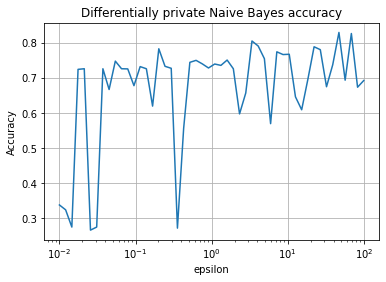

In [61]:
plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.grid()
plt.savefig("DP-NaiveBayes")
plt.show()

In [49]:
met.accuracy_score(np.array(testx_ref.iloc[:,-1:]), test_pred)

0.7877337973031753

In [57]:
epsilons = np.logspace(-2, 2, 50)
accuracy = list()

for epsilon in epsilons:
    clf = dpmod.RandomForestClassifier(epsilon=epsilon)
    clf.fit(trainx_ref.iloc[:,:55],trainx_ref.iloc[:,-1:])
    
    accuracy.append(clf.score(testx_ref.iloc[:,:55], testx_ref.iloc[:,-1:]))

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy le

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy le

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy le

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy le

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy le

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-ve

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-ve

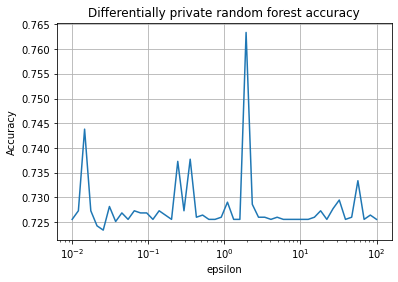

In [59]:
plt.semilogx(epsilons, accuracy)
plt.title("Differentially private random forest accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.grid()
plt.savefig("DP-RandomForest")
plt.show()